# Stock Price Trend Prediction using LSTM

**Author:** Susan Chandra Bonkuri  
**College:** IIITDM Kancheepuram  
**Roll Number:** CS23B2026  
**Email:** cs23b2026@iiitdm.ac.in  
**Project Type:** AIML Internship - Second Project  
**Project Title:** Stock Price Trend Prediction with LSTM  
**Created by Susan Chandra Bonkuri**

---

## **Project Description**

This project aims to predict the future stock price trends of Apple Inc. (AAPL) using a Long Short-Term Memory (LSTM) Recurrent Neural Network. LSTM models are well-suited for time series data and are widely used in stock market prediction.

---

## **Table of Contents**

1. Introduction  
2. Problem Statement  
3. Tools and Technologies Used  
4. Data Collection  
5. Data Preprocessing  
6. Model Building (LSTM)  
7. Model Training  
8. Model Testing and Prediction  
9. Results and Visualization  
10. Conclusion  


## Install Required Libraries
We need to install essential Python libraries for data handling, visualization, scaling, and model building.


In [1]:
!pip install yfinance pandas numpy matplotlib seaborn scikit-learn tensorflow


## Importing Required Libraries


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


## Data Collection

Using Yahoo Finance API to fetch historical stock data for Apple Inc. (AAPL) from 2015 to 2024.


In [3]:
df = yf.download('AAPL', start='2015-01-01', end='2024-12-31', auto_adjust=True)
df.reset_index(inplace=True)
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.288586,24.757340,23.848711,24.746232,212818400
1,2015-01-05,23.604332,24.137513,23.417720,24.057535,257142000
2,2015-01-06,23.606562,23.866487,23.244442,23.668766,263188400
3,2015-01-07,23.937565,24.037535,23.704298,23.815377,160423600
4,2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000


## Data Description

Let's check the structure and descriptive statistics of the dataset.


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        2515 non-null   datetime64[ns]
 1   (Close, AAPL)   2515 non-null   float64       
 2   (High, AAPL)    2515 non-null   float64       
 3   (Low, AAPL)     2515 non-null   float64       
 4   (Open, AAPL)    2515 non-null   float64       
 5   (Volume, AAPL)  2515 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.0 KB


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,2019-12-31 01:37:54.512922624,93.994612,94.907267,92.978799,93.906768,1.171176e+08
min,2015-01-02 00:00:00,20.647457,20.951431,20.448617,20.569748,2.323470e+07
25%,2017-07-01 12:00:00,35.277451,35.681949,34.917551,35.308426,7.108210e+07
50%,2019-12-31 00:00:00,64.509270,64.859473,63.698897,64.267085,1.003845e+08
75%,2022-06-29 12:00:00,150.535973,152.267260,148.515864,150.317850,1.426222e+08
max,2024-12-30 00:00:00,258.396667,259.474086,257.010028,257.568678,6.488252e+08
std,NaN,65.518476,66.112100,64.829414,65.435983,6.839566e+07


## Data Visualization

We will visualize the historical closing price of Apple Inc. (AAPL) stock to understand its trend over time.


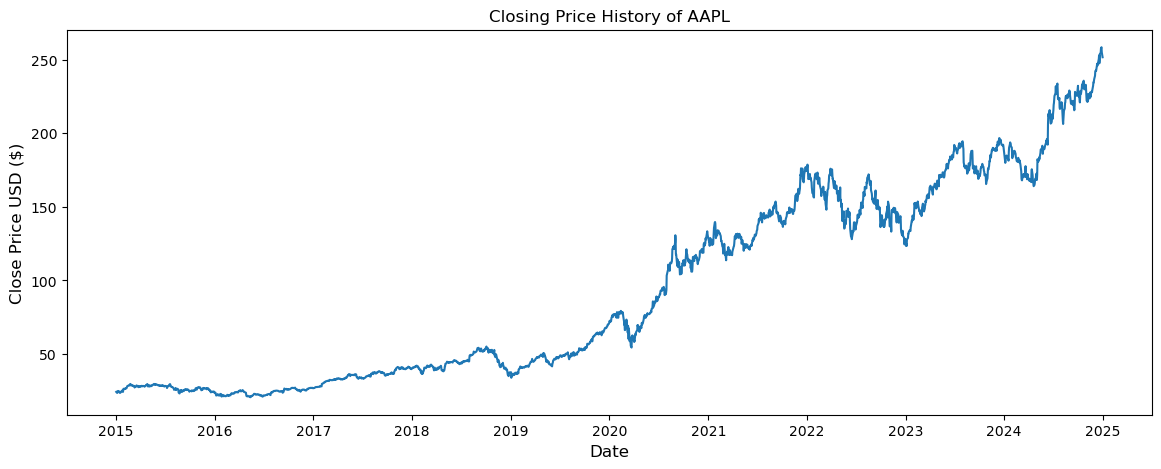

In [5]:
plt.figure(figsize=(14,5))
plt.title('Closing Price History of AAPL')
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.show()


## Data Preprocessing

We will scale the 'Close' price values to a range of 0 to 1 using MinMaxScaler.  
This is important to improve LSTM model performance and convergence.


In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Download data
df = yf.download('AAPL', start='2015-01-01', end='2024-12-31', auto_adjust=True)
df.reset_index(inplace=True)

# Check columns
print(df.columns)

# Use 'Close' column for prediction
data = df[['Close']]  # double brackets — ensures 2D array for scaler
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print("Scaled data shape:", scaled_data.shape)


[*********************100%***********************]  1 of 1 completed

MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
Scaled data shape: (2515, 1)


## Creating the Training Dataset

Using the past 60 days' closing prices to predict the next day's closing price.


In [11]:
# Create the training dataset
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # past 60 days
    y_train.append(train_data[i, 0])       # 61st day (target)

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape input to [samples, time steps, features] for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (1952, 60, 1)
y_train shape: (1952,)


## Building the LSTM Model

We will create an LSTM-based Recurrent Neural Network to learn the time-dependent patterns in stock price data.


In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))  # final output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()


C:\Users\susan\anaconda3\envs\mlenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

## Training the LSTM Model

We will train the model using the training dataset for 10 epochs with a batch size of 32.


In [13]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0193
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.8486e-04
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.8775e-04
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.7821e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.4628e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.3593e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.6306e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.2686e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.2967e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.1466e-04


## Preparing the Test Dataset and Making Predictions

We will now prepare the test data and use our trained LSTM model to predict the closing prices.


In [14]:
# Create testing data from the scaled dataset (last 20%)
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]  # actual closing prices (unscaled)

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert to numpy array and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)

# Undo the scaling to get actual predicted prices
predictions = scaler.inverse_transform(predictions)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
